# Disney Plus Content Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,1-Apr-20,2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [6]:
df.describe()

# from 1928 to 2021


,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


## Null values present in the dataset

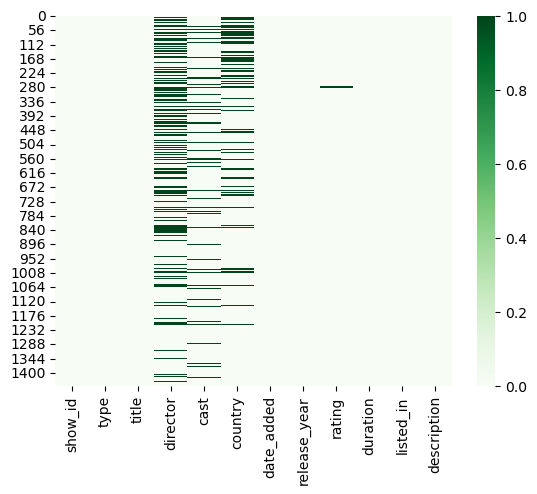

In [7]:
sns.heatmap(df.isnull(),cmap='Greens')
plt.show()

In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

### Dropping "show_id" and 3 missing values in "dated_added" &  "rating"

In [9]:
df.drop(['show_id'],axis=1)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [10]:
df.dropna(subset=['rating'], inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,24-Nov-21,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [11]:
df.dropna(subset=['date_added'], inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,24-Nov-21,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [12]:
df.isnull().sum()


show_id           0
type              0
title             0
director        468
cast            189
country         216
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [13]:
df.duplicated().count

<bound method Series.count of 0       False
1       False
2       False
3       False
5       False
        ...  
1445    False
1446    False
1447    False
1448    False
1449    False
Length: 1444, dtype: bool>

## Check Content Type

In [14]:
df['type'].value_counts()

Movie      1051
TV Show     393
Name: type, dtype: int64

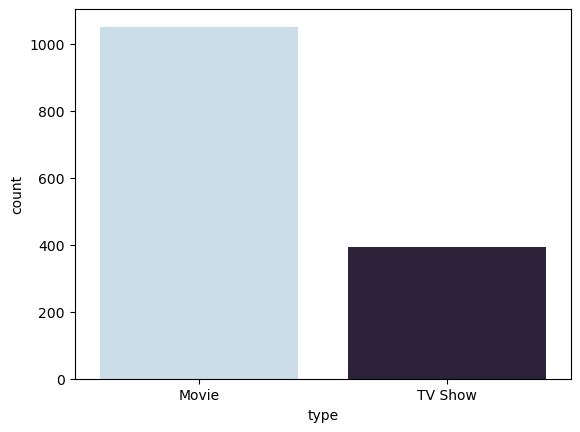

In [17]:
sns.countplot(x='type',data=df,palette="ch:s=.25,rot= -0.25")
plt.show()

## Release by Years

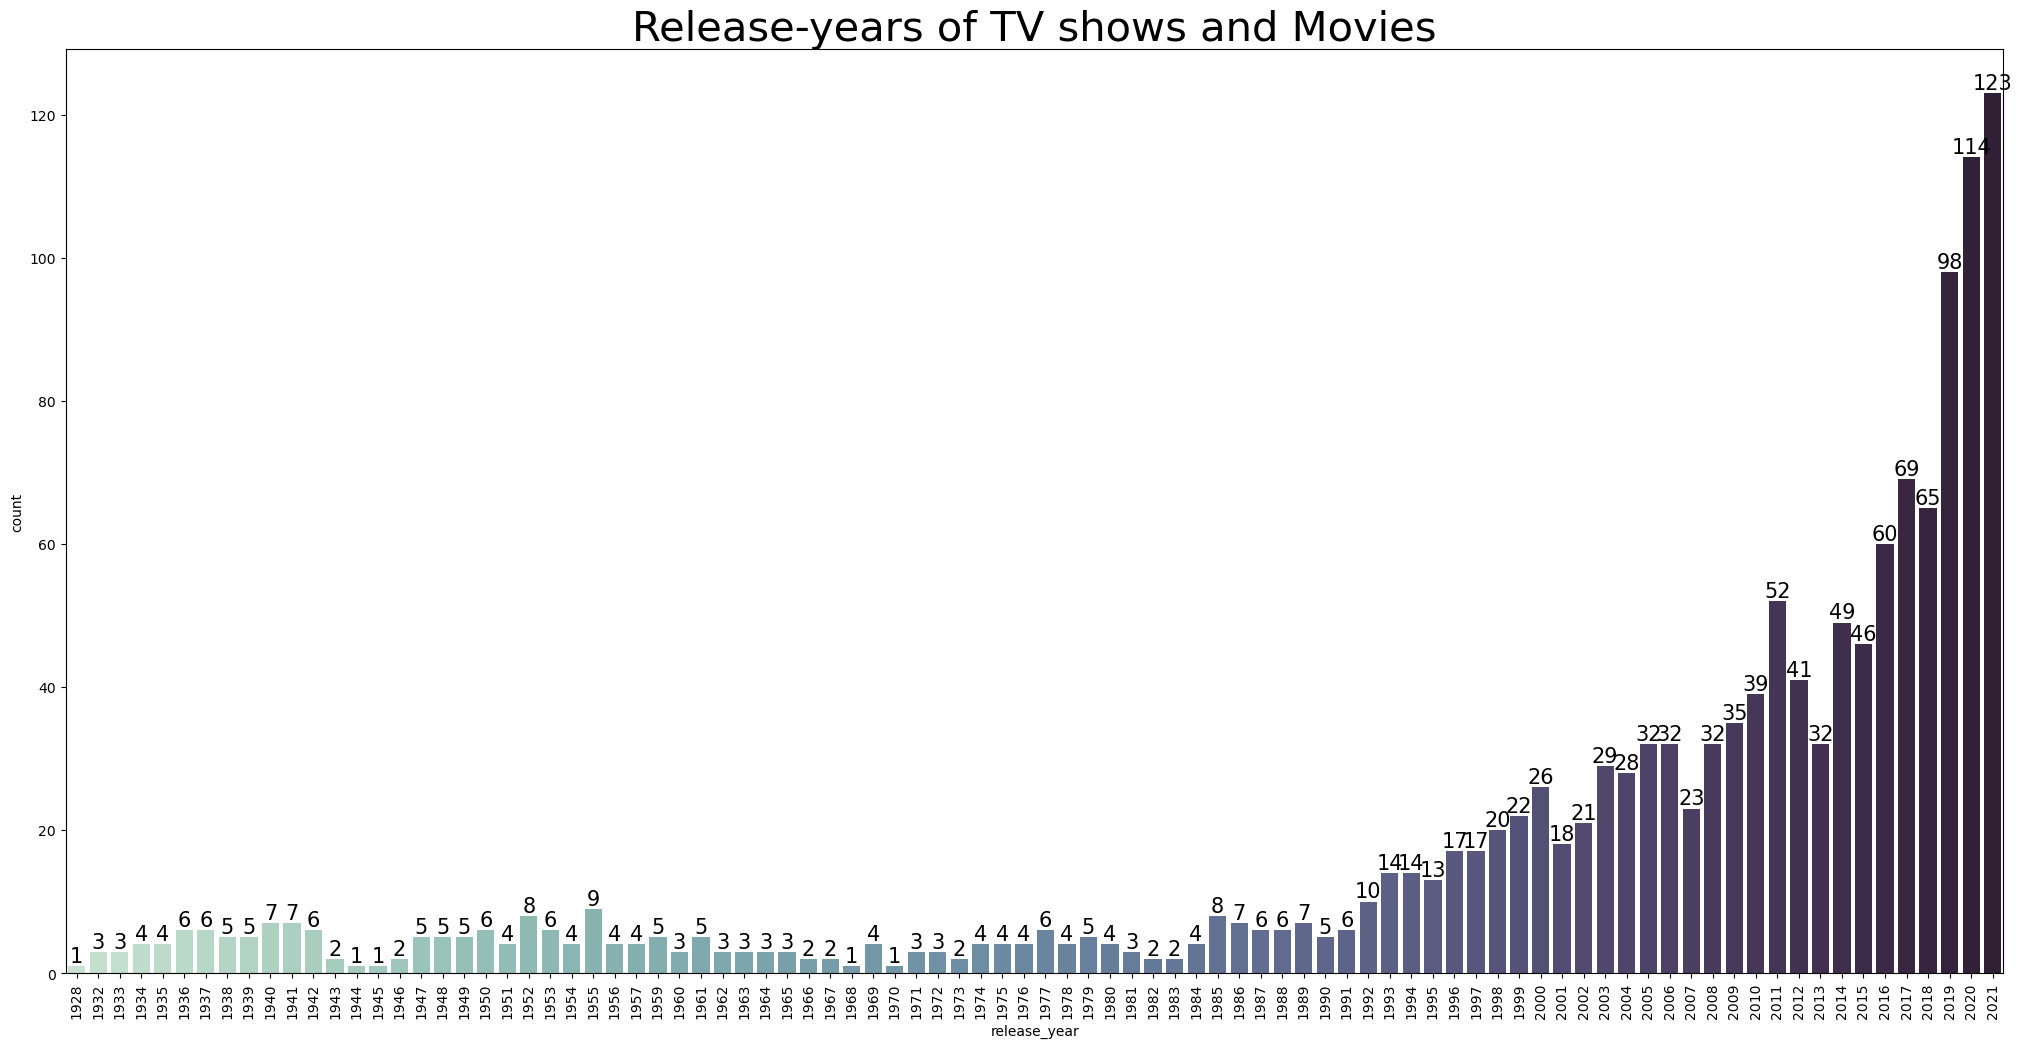

In [18]:
plt.figure(figsize=(25, 12))
plt.title("Release-years of TV shows and Movies",fontsize=30)
c1=sns.countplot(x='release_year',data=df,palette="ch:s=.6,rot=-.6")
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

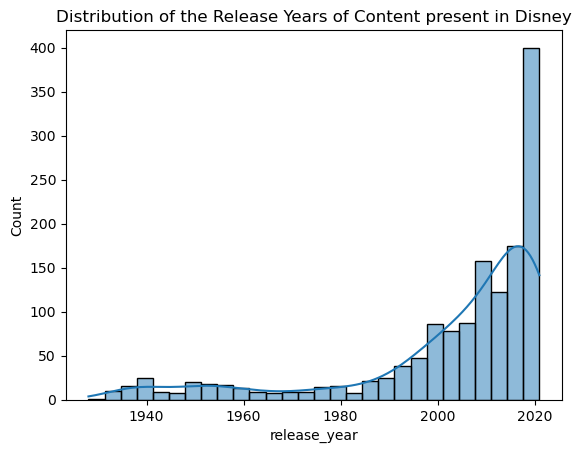

In [19]:

sns.histplot(df["release_year"], kde=True)
plt.title("Distribution of the Release Years of Content present in Disney", size=12)
plt.show()

## Release by Month

### Creating new feature  "month_added" & "year_added"

In [20]:
df["date_added"] = pd.to_datetime(df["date_added"])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [54]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021


In [110]:
data_sub = df.groupby('type')['month_added'].value_counts().unstack().loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub = data_sub.reset_index()

In [111]:
print(data_sub)

type  month_added  TV Show  Movie
0               1       21     59
1               2       15     39
2               3        7     20
3               4       23     71
4               5       27     52
5               6       20     46
6               7       30     77
7               8       19     47
8               9       25     51
9              10       16     56
10             11      111    695
11             12        9     42


## Plot of Release by Months

<function matplotlib.pyplot.show(close=None, block=None)>

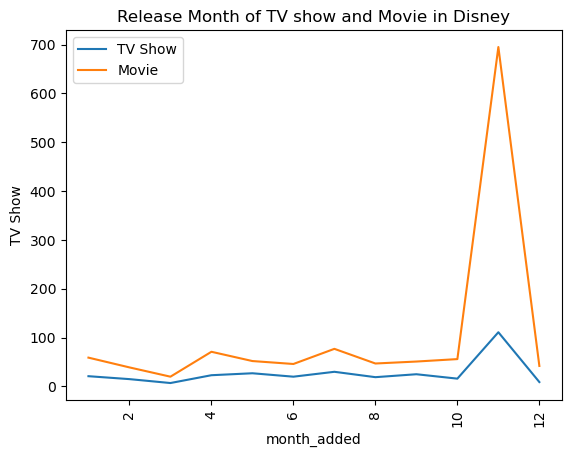

In [115]:

plt.title("Release Month of TV show and Movie in Disney", size=12)


sns.lineplot(data_sub, x="month_added", y="TV Show", label = "TV Show")


sns.lineplot(data_sub, x="month_added", y="Movie" , label = "Movie")


plt.xticks(rotation=90)
plt.show


TV-G = Most parents will find this program suitable for all ages.
PG = Parental guidance suggested – Some material may not be suitable for children.
TV-PG = This program contains material that parents may find unsuitable for younger children .
PG-13 = Parents strongly cautioned – Some material may be inappropriate for children under 13.
TV-14 = This program contains material that most parents would find unsuitable for children under 14 years of age .
G = Appropriate for people of all ages .
TV-Y7 = This program is designed for children age 7 and above.
TV-Y = This program is designed to be appropriate for all children.
TV-Y7-FV = indicating programs directed to older children and containing more intense or combative fantasy violence.

## Genre

In [7]:
from collections import Counter

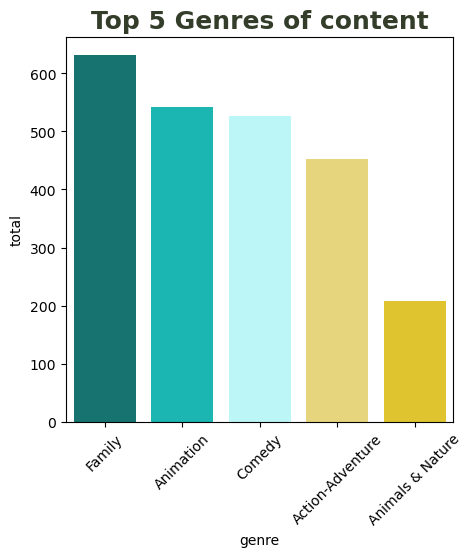

In [8]:
genres_list = []
for i in df['listed_in']:
    genres_list.extend(i.split(', '))

plt.figure(figsize=(5, 5))
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
c1=sns.barplot(data=df_plot, x='genre', y='total', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
plt.title('Top 5 Genres of content', fontsize=18, weight=600, color='#333d29')
plt.xticks(rotation=45)
plt.show(c1)



## Removing nan string value from director column

In [133]:
df2 = df2.loc[df2['director']!= 'nan']

In [134]:
df2['director'].sample(100)


547                    Rob Reiner
131                  Bryan Singer
1008               Michael Hegner
1088    John Musker, Ron Clements
1302                     Jim Fall
                  ...            
1420               Paul Schneider
29                     John Kahrs
818                   Mark Taylor
1199                   David Hand
1324                  Bruce Smith
Name: director, Length: 100, dtype: object

## Plot of Directors with Most Movies Top 10 

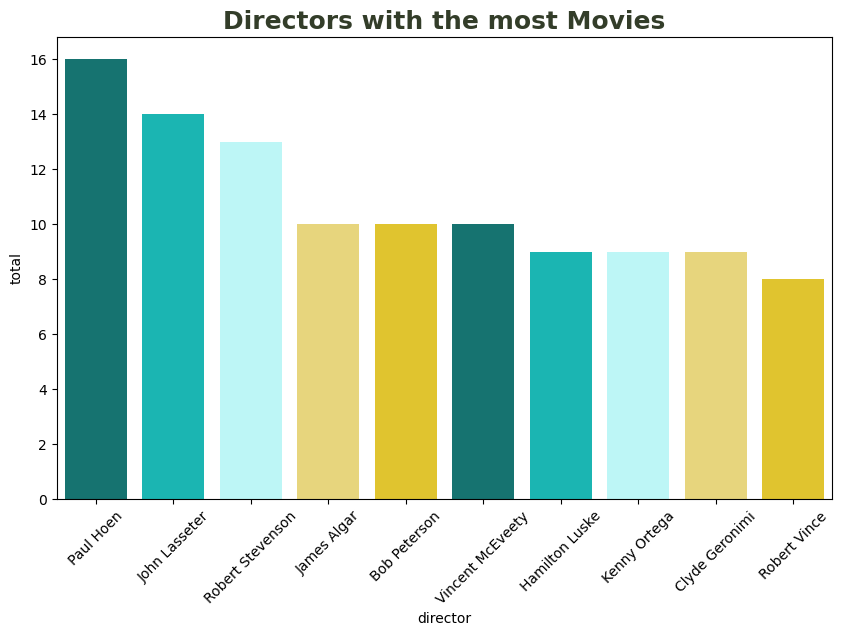

In [139]:


director_list = []
for i in df2['director']:
    director_list.extend(i.split(', '))

plt.figure(figsize=(10, 6))
df_plot1 = pd.DataFrame(Counter(director_list).most_common(10), columns=['director', 'total'])
c2=sns.barplot(data=df_plot1, x='director', y='total', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
plt.title('Directors with the most Movies', fontsize=18, weight=600, color='#333d29')
plt.xticks(rotation=45)
plt.show(c2)


## Cast

In [124]:
df3 = df.dropna(subset=['cast'])
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021


## Plot of Cast with Most Role Top 10 

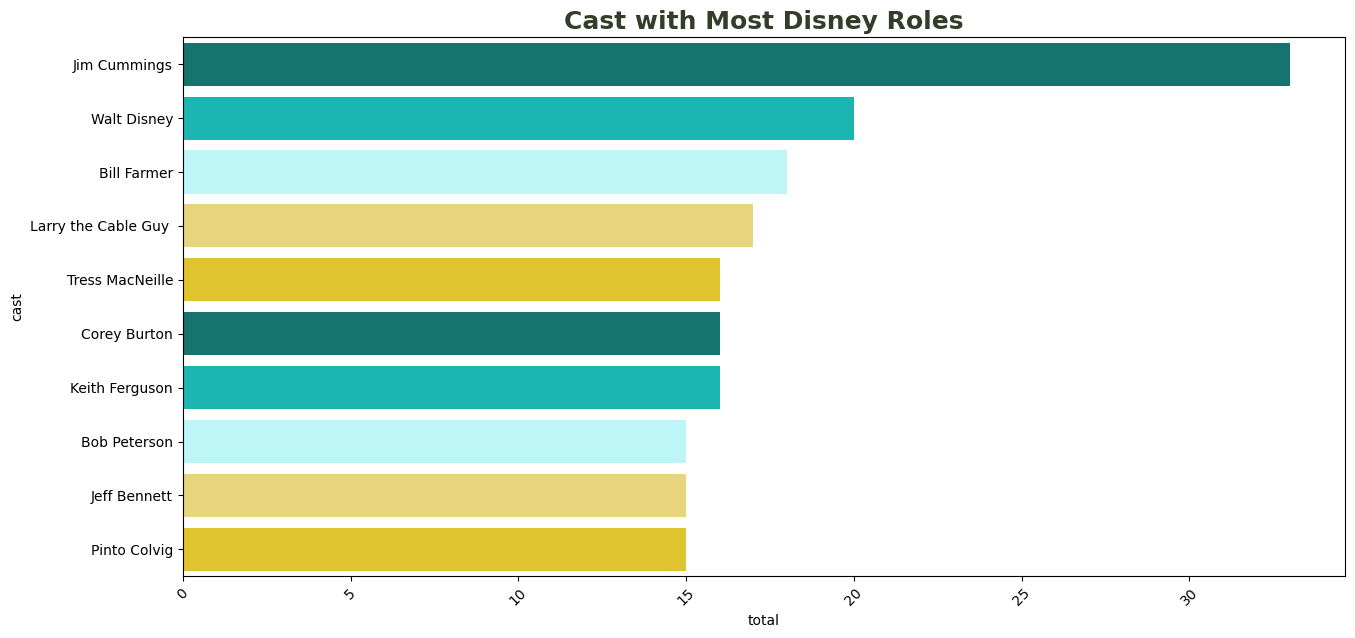

In [93]:
df3['cast'] = df3['cast'].astype(str)

cast_list = []
for i in df3['cast']:
    cast_list.extend(i.split(', '))

plt.figure(figsize=(15, 7))
df_plot3 = pd.DataFrame(Counter(cast_list).most_common(10), columns=['cast', 'total'])
c3=sns.barplot(data=df_plot3, x='total', y='cast', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
plt.title('Cast with Most Disney Roles', fontsize=18, weight=600, color='#333d29')
plt.xticks(rotation=45)
plt.show(c3)



In [ ]:

# df_plot3 = pd.DataFrame(Counter(cast_list).most_common(5), columns=['cast', 'total']).sort_values(by='total', ascending=True)

## Rating Defination

TV-PG = This program contains material that parents may find unsuitable for younger children .
TV-G = Most parents will find this program suitable for all ages.
G = Appropriate for people of all ages .
PG = Parental guidance suggested – Some material may not be suitable for children.
TV-Y7 = This program is designed for children age 7 and above.
TV-14 = This program contains material that most parents would find unsuitable for children under 14 years of age .
PG-13 = Parents strongly cautioned – Some material may be inappropriate for children under 13.
TV-Y = This program is designed to be appropriate for all children.
TV-Y7-FV = indicating programs directed to older children and containing more intense or combative fantasy violence.

## Plot of Distribtuion by Rating

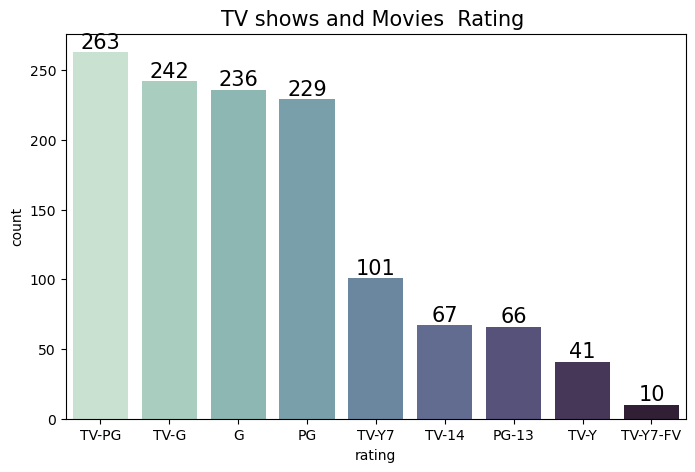

In [98]:
plt.figure(figsize=(8, 5))

plt.title("TV shows and Movies  Rating ",fontsize=15)

large_to_small = df.groupby('rating').size().sort_values().index[::-1]

c1=sns.countplot(x='rating',data=df, order = large_to_small, palette="ch:s=.6,rot=-.6")
c1.bar_label(c1.containers[0],size = 15)
plt.show()

## Duration

### Changing duration from string " x min " to int 

In [146]:
df4 = df.loc[df['type'] =='Movie']
df4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021


In [152]:
df4['duration'].replace('min', '')

0        23
1        91
2        23
3        41
5        94
       ... 
1445    108
1446    106
1447    107
1448    112
1449      2
Name: duration, Length: 932, dtype: object

In [153]:
df4['duration'].head()


0    23
1    91
2    23
3    41
5    94
Name: duration, dtype: object

In [156]:
#df4['duration'] = df4['duration'].astype("int64")

C:\Users\chris\AppData\Local\Temp\ipykernel_43792\2572204936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['duration'] = df4['duration'].astype("int64")


In [158]:
#df4['duration'] = df4['duration'].astype("int64")

C:\Users\chris\AppData\Local\Temp\ipykernel_43792\2597944871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['duration'] = pd.to_numeric(df4['duration'])


In [160]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 1449
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           932 non-null    object        
 1   type              932 non-null    object        
 2   title             932 non-null    object        
 3   director          932 non-null    object        
 4   cast              932 non-null    object        
 5   country           848 non-null    object        
 6   date_added        932 non-null    datetime64[ns]
 7   release_year      932 non-null    int64         
 8   rating            932 non-null    object        
 9   duration          932 non-null    int64         
 10  listed_in         932 non-null    object        
 11  description       932 non-null    object        
 12  month_added       932 non-null    int64         
 13  month_name_added  932 non-null    object        
 14  year_added        932 non

## Plot of Movie Duration Distribution in Mins

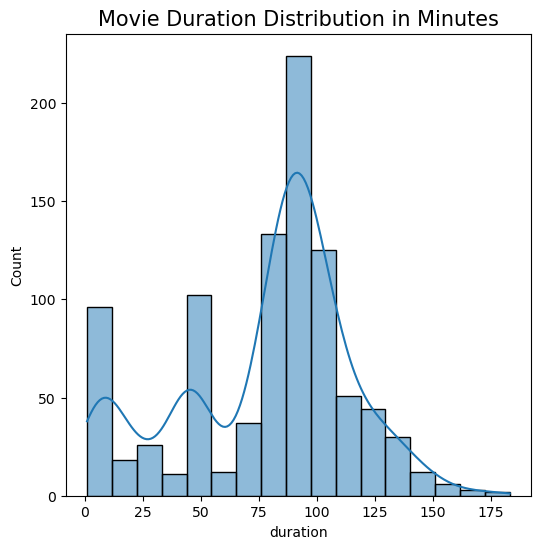

In [166]:
plt.figure(figsize=(6,6))

sns.histplot(df4["duration"], kde=True)

plt.title("Movie Duration Distribution in Minutes", size=15)
plt.show()

In [79]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


In [28]:

from wordcloud import WordCloud,STOPWORDS

In [29]:
print(df['description'])

0        Join Mickey and the gang as they duck the halls!
1       Santa Claus passes his magic bag to a new St. ...
2               Sid the Sloth is on Santa's naughty list.
3                    This is real life, not just fantasy!
5       An inside look at the legendary life of advent...
                              ...                        
1445    Wolverine unites with legendary X-Men to fight...
1446    Larry Daley returns to rescue some old friends...
1447    True story of Eddie Edwards, a British ski-jum...
1448    Despite the wishes of their traditional famili...
1449           View one of Sparky's favorite home movies.
Name: description, Length: 1444, dtype: object


In [30]:
print(df['cast'])

0       Chris Diamantopoulos, Tony Anselmo, Tress MacN...
1                Jim Varney, Noelle Parker, Douglas Seale
2       Raymond Albert Romano, John Leguizamo, Denis L...
3       Darren Criss, Adam Lambert, Derek Hough, Alexa...
5                   Jacques Yves Cousteau, Vincent Cassel
                              ...                        
1445    Hugh Jackman, Liev Schreiber, Danny Huston, wi...
1446    Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...
1447    Tom Costello, Jo Hartley, Keith Allen, Dickon ...
1448    Parminder Nagra, Keira Knightley, Jonathan Rhy...
1449                                        Charlie Tahan
Name: cast, Length: 1444, dtype: object


## Description

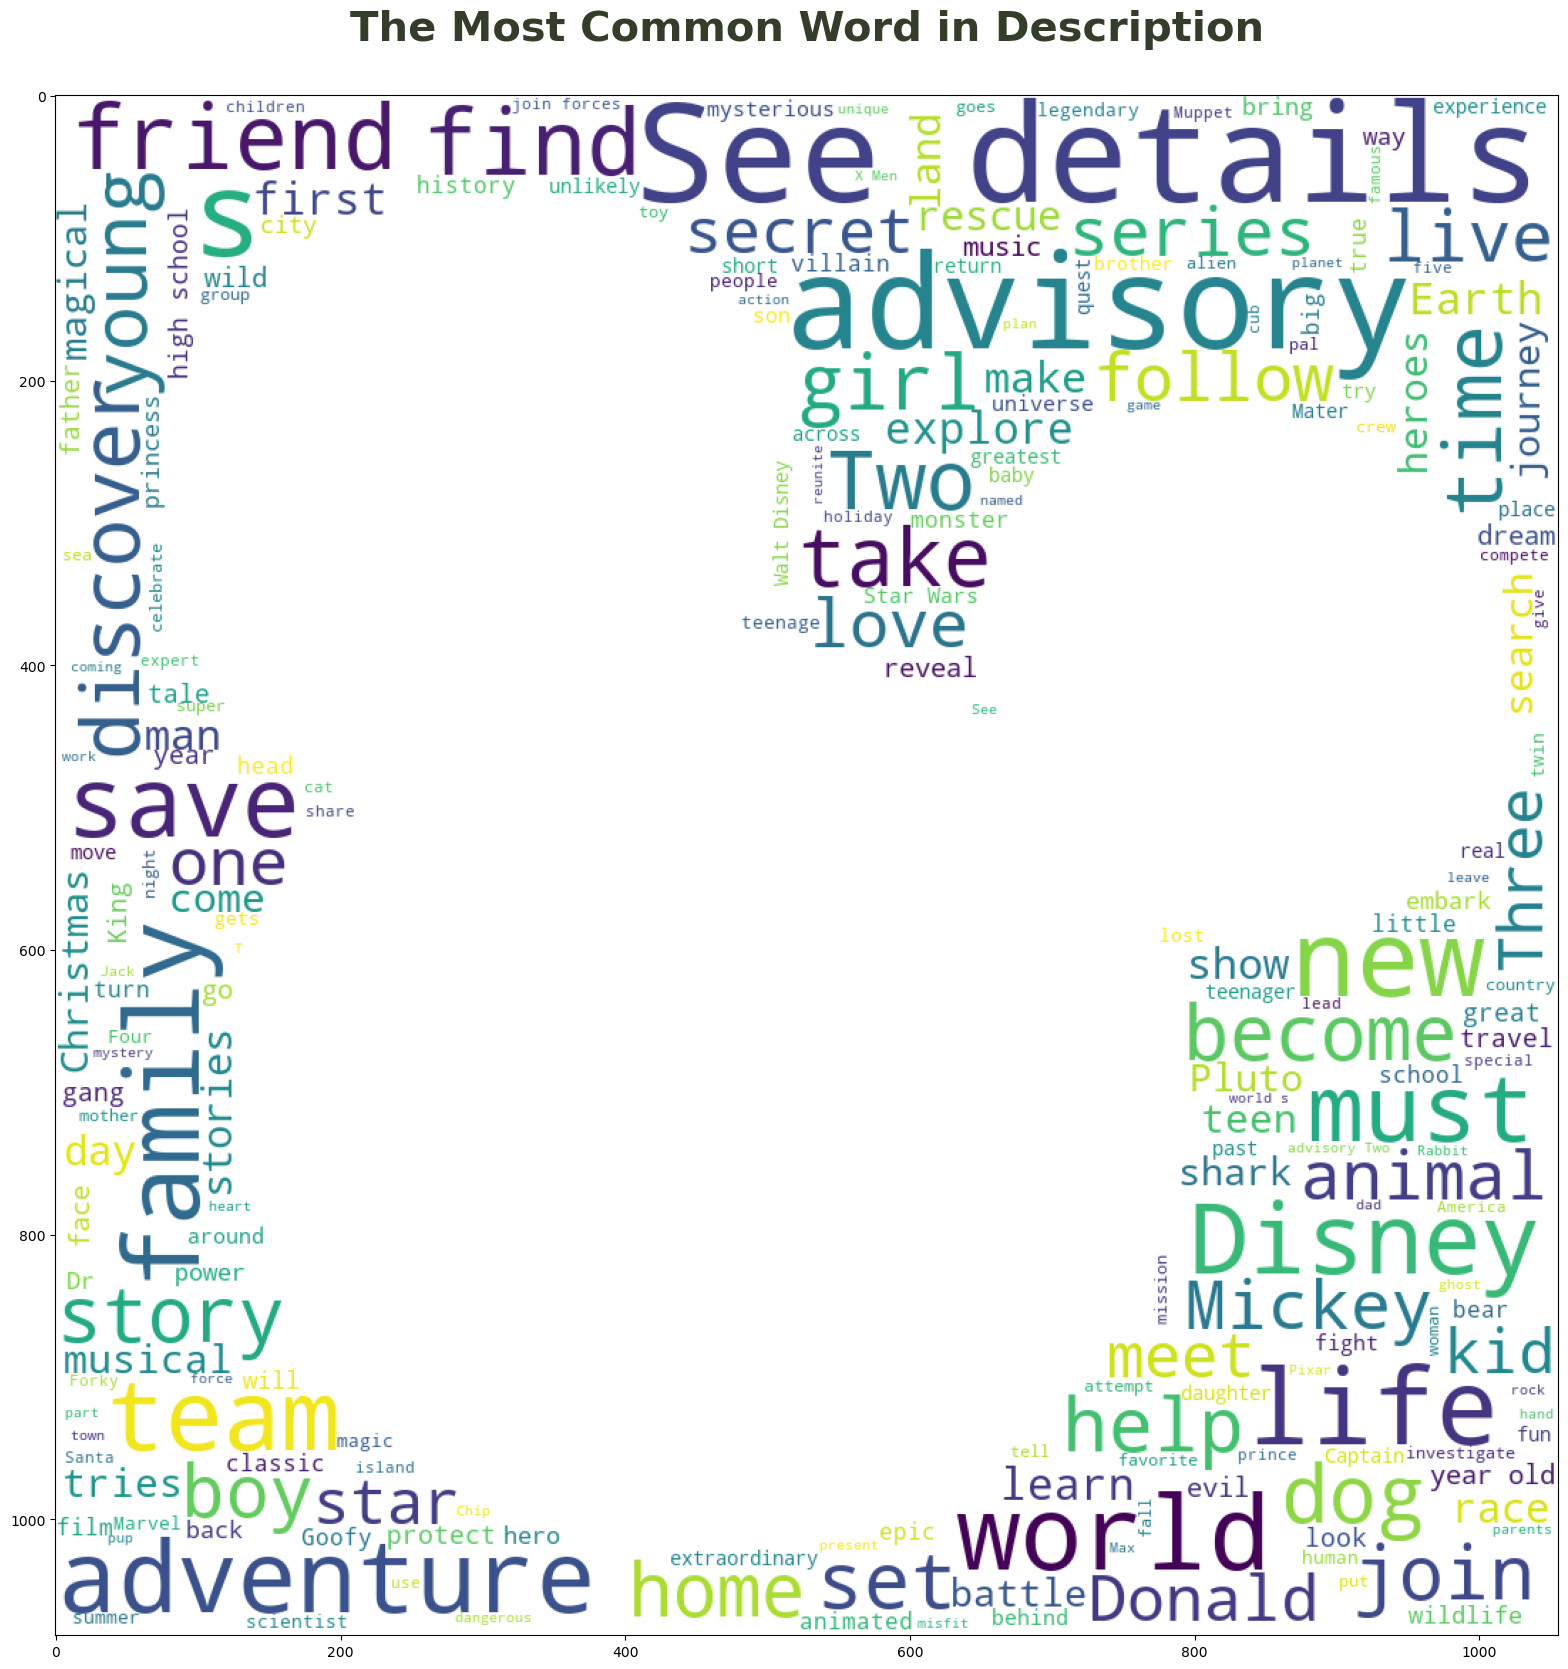

In [32]:
from PIL import Image

disney_mask = np.array(Image.open("disney_mask.png"))


plt.figure(figsize=(20,20))
stopwords = set(STOPWORDS)
plt.title('The Most Common Word in Description\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=800, min_font_size=10,
                height=800,width=1600,background_color="white",mask = disney_mask, stopwords = stopwords).generate(' '.join(df['description']))

plt.imshow(wc)

In [10]:


df['description'].dtype

dtype('O')

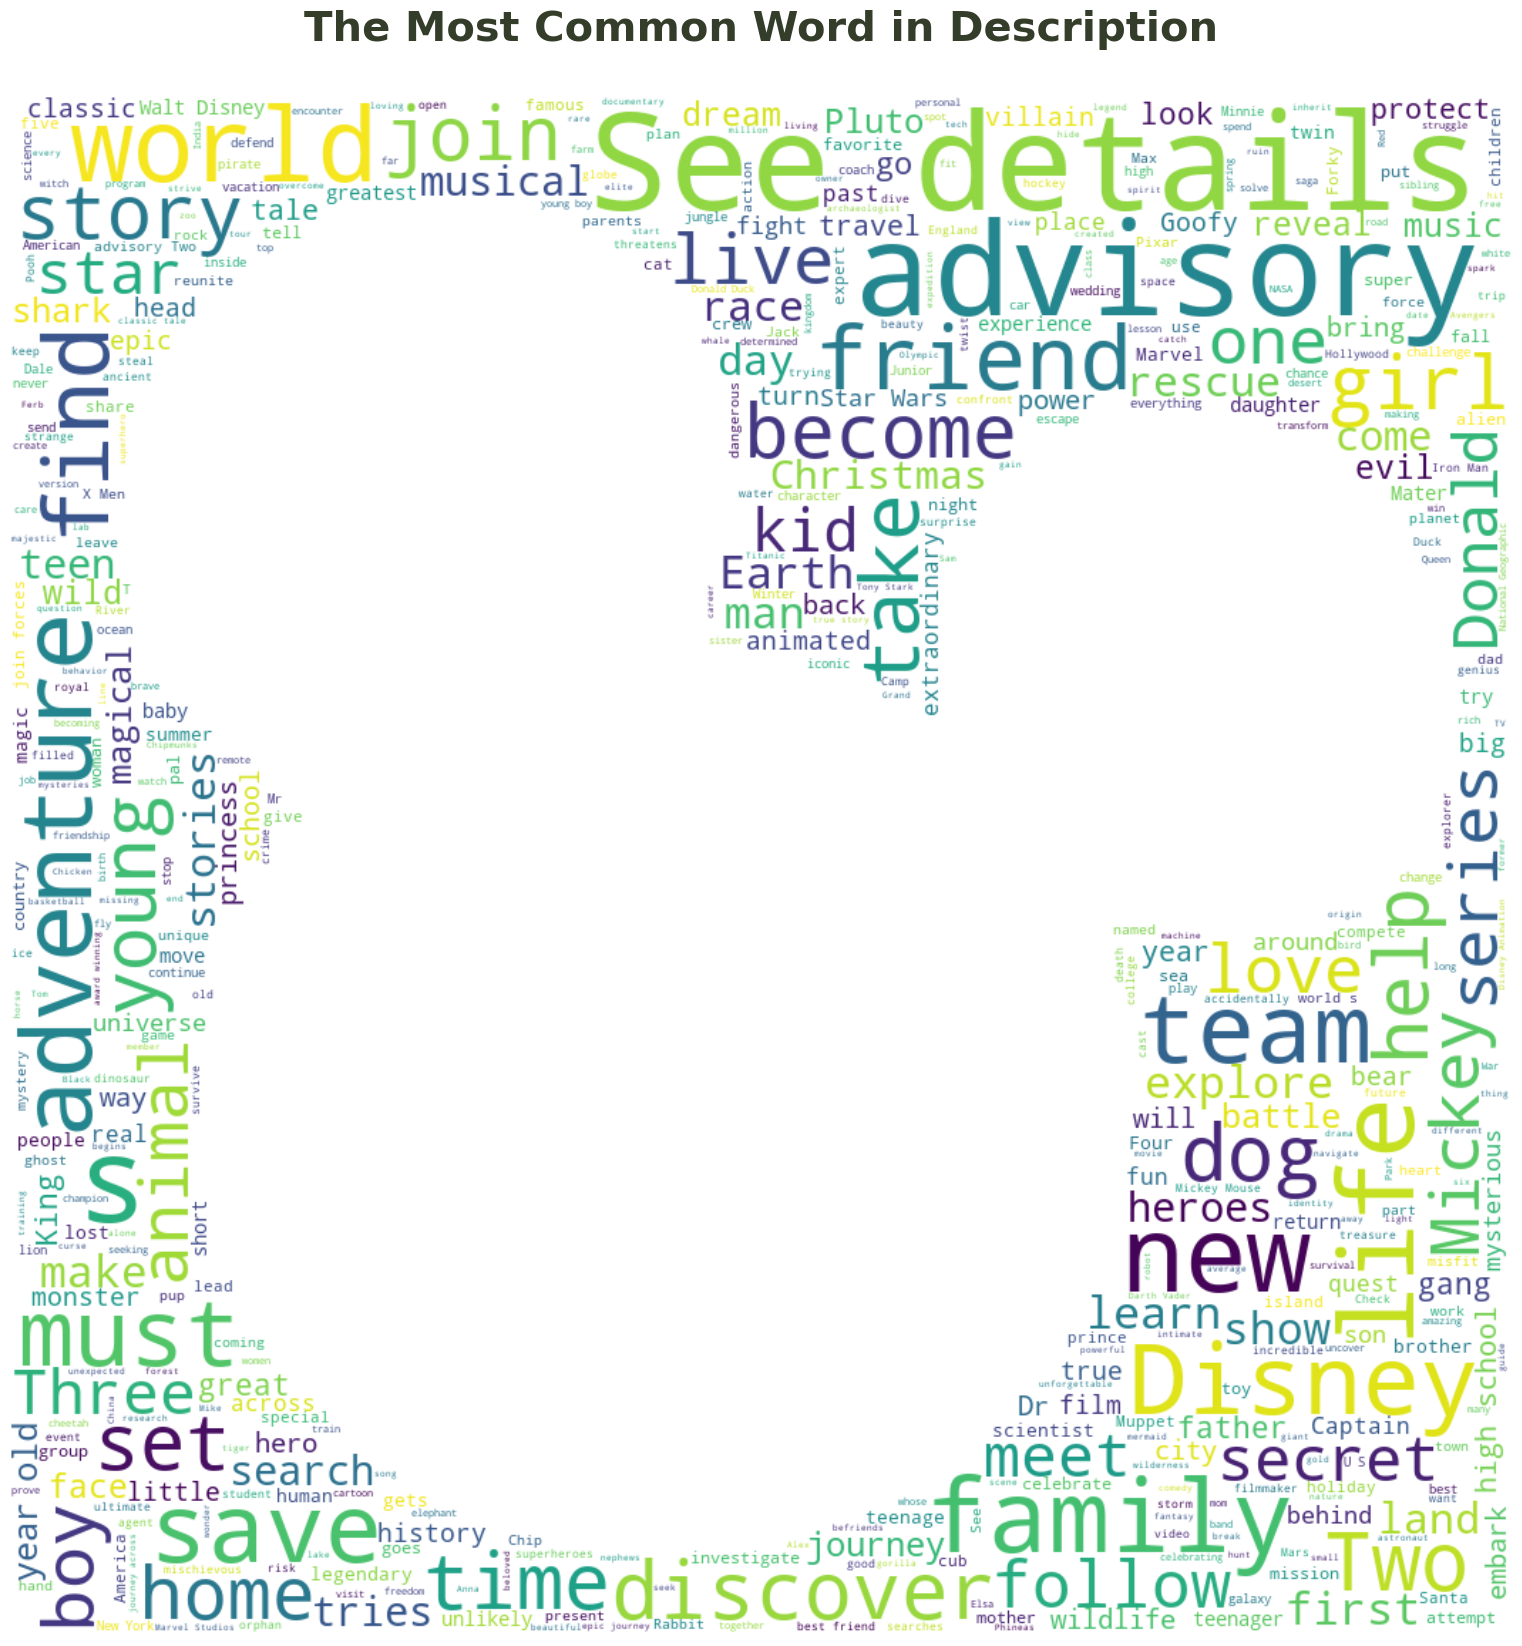

In [37]:
disney_mask = np.array(Image.open("disney_mask.png"))


plt.figure(figsize=(20,20))
stopwords = set(STOPWORDS)
plt.title('The Most Common Word in Description\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=500,background_color="white",mask = disney_mask, stopwords = stopwords)

wc.generate(' '.join(df['description']))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()